**NASSCOM MINI PROJECT - 20191COM0028**

**CAMPUS PLACEMENT PREDICTION**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
placement_df = pd.read_csv("Placement_Data_Full_Class.csv")
placement_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [57]:
placement_df.shape

(215, 15)

In [58]:
placement_df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

There are 15 columns in the dataset which are

Gender : Male-M, Female-F - gender

Secondary Education percentage- 10th Grade - ssc_p

Board of Education- Central/ Others - ssc_b

Higher Secondary Education percentage- 12th Grade - hsc_p

Board of Education- Central/ Others - hsc_b

Specialization in Higher Secondary Education - hsc_s

Degree Percentage - degree_p

Under Graduation(Degree type) - Field of degree education - degree_t

Work Experience - work_ex

Employability test percentage ( conducted by college) - etest_p

Post Graduation(MBA)- Specialization - specialisation

MBA percentage - mba_p

Status of placement- Placed/Not placed - status

Salary offered by corporate to candidates - salary.

In [59]:
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [60]:
placement_df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**Cleaning the data.**

In [61]:
placement_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Handling with categorical data.**

In [84]:
placement_df["gender"] = placement_df["gender"].astype('category')
placement_df["ssc_b"] = placement_df["ssc_b"].astype('category')
placement_df["hsc_b"] = placement_df["hsc_b"].astype('category')
placement_df["degree_t"] = placement_df["degree_t"].astype('category')
placement_df["workex"] = placement_df["workex"].astype('category')
placement_df["specialisation"] = placement_df["specialisation"].astype('category')
placement_df["status"] = placement_df["status"].astype('category')
placement_df["hsc_s"] = placement_df["hsc_s"].astype('category')
placement_df.dtypes

gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
dtype: object

**Calculating the number of students.**

Number of male students:  139
Number of female students:  76


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


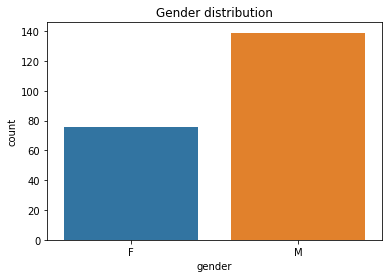

In [63]:
print("Number of male students: ", len(placement_df[placement_df.gender=='M']))
print("Number of female students: ", len(placement_df[placement_df.gender=='F']))
sns.countplot('gender', data=placement_df);
plt.title("Gender distribution");

In [64]:
male = placement_df[placement_df.gender=='M']
female = placement_df[placement_df.gender=='F']

**Secondary Education Percentage**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


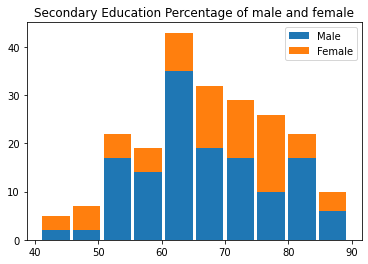

In [65]:
plt.hist([male.ssc_p, female.ssc_p], stacked = True, rwidth = 0.9);
plt.title("Secondary Education Percentage of male and female")
plt.legend(['Male','Female']);

**Higher Secondary Education Percentage**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


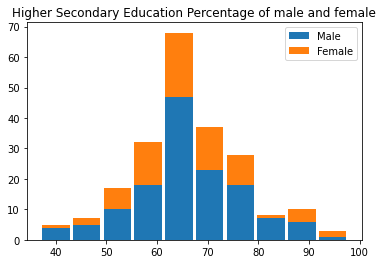

In [66]:
plt.hist([male.hsc_p, female.hsc_p], stacked = True, rwidth = 0.9);
plt.title("Higher Secondary Education Percentage of male and female")
plt.legend(['Male','Female']);

**Degree Percentage**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


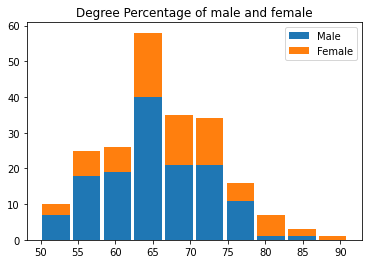

In [67]:
plt.hist([male.degree_p, female.degree_p], stacked = True, rwidth = 0.9);
plt.title("Degree Percentage of male and female")
plt.legend(['Male','Female']);

**MBA percentage**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


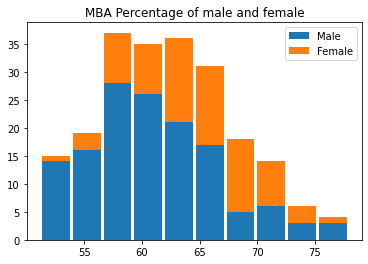

In [68]:
plt.hist([male.mba_p, female.mba_p], stacked = True, rwidth = 0.9);
plt.title("MBA Percentage of male and female")
plt.legend(['Male','Female']);

**Percentage distribution among male**

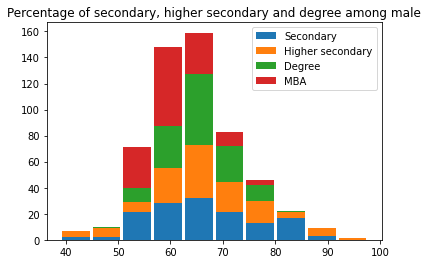

In [69]:
plt.hist([male.ssc_p, male.hsc_p, male.degree_p, male.mba_p], stacked = True, rwidth = 0.9);

plt.title('Percentage of secondary, higher secondary and degree among male')

plt.legend(['Secondary', 'Higher secondary','Degree', 'MBA'])

**Percentage distribution among female**

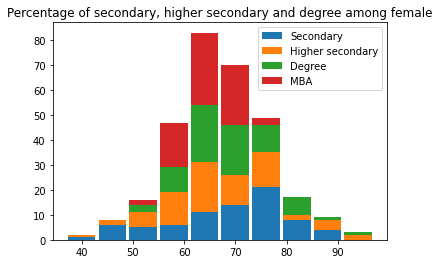

In [70]:
plt.hist([female.ssc_p, female.hsc_p, female.degree_p, female.mba_p], stacked = True, rwidth = 0.9);

plt.title('Percentage of secondary, higher secondary and degree among female')

plt.legend(['Secondary', 'Higher secondary','Degree', 'MBA'])

There are 74 students with work experience and 141 without work experience: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


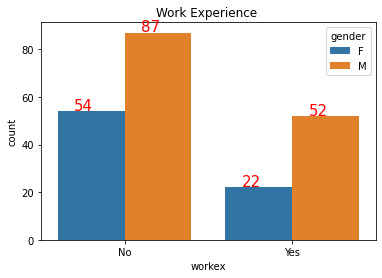

In [71]:
print("There are {} students with work experience and {} without work experience: ".format(len(placement_df[placement_df.workex=='Yes']),len(placement_df[placement_df.workex=='No'])))
campus = sns.countplot('workex', hue = placement_df.gender, data = placement_df);
totals = []

# finding the values and appending to list
for i in campus.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in campus.patches:
    campus.text(i.get_x()--.1, i.get_height()+.5,
            str(round(i.get_height(), 2)), fontsize=15,
                color='red')
    
plt.title("Work Experience ");


**Students placed depending on their specialization in higher secondary education.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


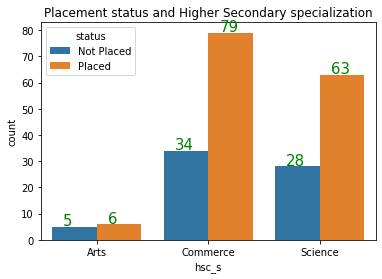

In [72]:
campus1 = sns.countplot('hsc_s', hue = placement_df.status, data = placement_df);
totals = []

for i in campus1.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in campus1.patches:
    campus1.text(i.get_x()--.1, i.get_height()+.5,str(round(i.get_height(), 2)),fontsize=15,color='green')

plt.title("Placement status and Higher Secondary specialization");

**Students being palced based on their field of degree education.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


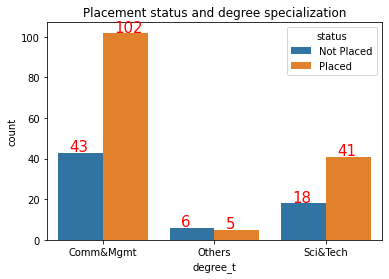

In [73]:
campus2 = sns.countplot('degree_t', hue = placement_df.status, data = placement_df);
totals = []

for i in campus2.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in campus2.patches:
    campus2.text(i.get_x()--.1, i.get_height()+.5,
            str(round(i.get_height(), 2)), fontsize=15,
                color='red')

plt.title("Placement status and degree specialization");

**Students being placed depending on their MBA specialization.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


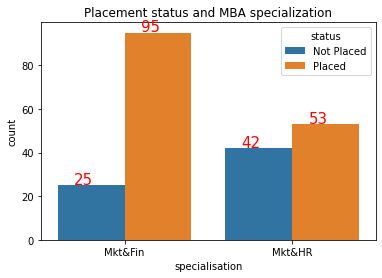

In [74]:
campus3 = sns.countplot('specialisation', hue = placement_df.status, data = placement_df);
totals = []

for i in campus3.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in campus3.patches:
    campus3.text(i.get_x()--.1, i.get_height()+.5, \
            str(round(i.get_height(), 2)), fontsize=15,
                color='red')

plt.title("Placement status and MBA specialization");

**Relation between work experience and placement status.** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


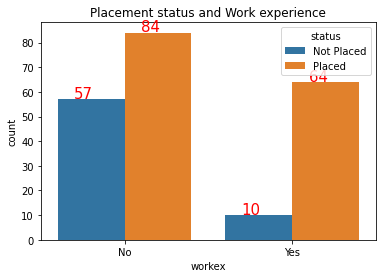

In [75]:
campus4 = sns.countplot('workex', hue = placement_df.status, data = placement_df);
totals = []

for i in campus4.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in campus4.patches:
    campus4.text(i.get_x()--.1, i.get_height()+.5, \
            str(round(i.get_height(), 2)), fontsize=15,
                color='red')
    
plt.title("Placement status and Work experience");

**Dropping the columns.**

In [82]:
placement_df = placement_df.drop('sl_no', axis=1)
placement_df = placement_df.drop('salary', axis=1)

**Converting the columns text values into numerical values.**

In [85]:
placement_df["gender"] = placement_df["gender"].cat.codes
placement_df["ssc_b"] = placement_df["ssc_b"].cat.codes
placement_df["hsc_b"] = placement_df["hsc_b"].cat.codes
placement_df["degree_t"] = placement_df["degree_t"].cat.codes
placement_df["workex"] = placement_df["workex"].cat.codes
placement_df["specialisation"] = placement_df["specialisation"].cat.codes
placement_df["status"] = placement_df["status"].cat.codes
placement_df["hsc_s"] = placement_df["hsc_s"].cat.codes
 
# display dataset
placement_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


**Checking for Correlation.**

In [106]:
placement_df.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
gender,1.000000,-0.068969,0.019429,-0.021334,0.065945,0.071827,-0.173217,0.061345,0.085153,0.084294,-0.106160,-0.300531,0.090670
ssc_p,-0.068969,1.000000,0.116194,0.511472,0.066996,0.236364,0.538404,0.205896,0.175675,0.261993,-0.172536,0.388478,0.607889
ssc_b,0.019429,0.116194,1.000000,-0.137013,0.605883,0.050919,0.038070,0.100863,-0.040744,-0.018991,-0.051565,0.083120,0.037297
hsc_p,-0.021334,0.511472,-0.137013,1.000000,-0.019548,-0.164091,0.434206,-0.086450,0.141025,0.245113,-0.241630,0.354823,0.491228
hsc_b,0.065945,0.066996,0.605883,-0.019548,1.000000,0.152227,0.067229,0.057960,0.038357,0.039108,0.002232,0.090201,0.016945
hsc_s,0.071827,0.236364,0.050919,-0.164091,0.152227,1.000000,0.137276,0.596300,0.007856,0.075643,0.172107,0.039345,0.033442
degree_p,-0.173217,0.538404,0.038070,0.434206,0.067229,0.137276,1.000000,0.079317,0.122648,0.224470,-0.218286,0.402364,0.479861
degree_t,0.061345,0.205896,0.100863,-0.086450,0.057960,0.596300,0.079317,1.000000,0.105816,0.011509,0.084361,0.116666,-0.020352
workex,0.085153,0.175675,-0.040744,0.141025,0.038357,0.007856,0.122648,0.105816,1.000000,0.056735,-0.191174,0.168811,0.276060
etest_p,0.084294,0.261993,-0.018991,0.245113,0.039108,0.075643,0.224470,0.011509,0.056735,1.000000,-0.236315,0.218055,0.127639


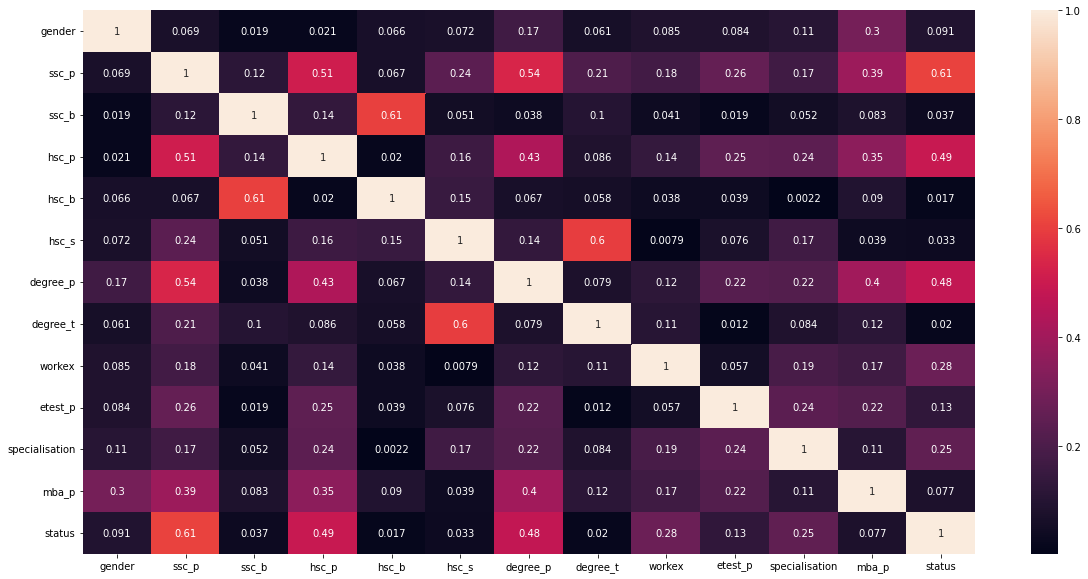

In [108]:
# heatmap for checking correlation 

plt.figure(figsize = (20,10))
sns.heatmap(placement_df.corr().abs(), annot = True)

In [90]:
X = placement_df.iloc[:, :-1].values
Y = placement_df.iloc[:, -1].values

# dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
 
# display dataset
placement_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [91]:
#trianing the model

# creating a classifier using sklearn
from sklearn.linear_model import LogisticRegression
 
campus_placement = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000).fit(X_train,Y_train)

campus_placement.score(X_test, Y_test)

0.7906976744186046

In [102]:
# creating Y_pred for test data
Y_pred = campus_placement.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, Y_pred))

0.7906976744186046
